In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



raw_crawled_data = pd.read_csv('./crawl/results.csv')

raw_crawled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24720 entries, 0 to 24719
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   url          24720 non-null  object
 1   id           24720 non-null  int64 
 2   title        24720 non-null  object
 3   price        24720 non-null  object
 4   posted_date  24720 non-null  object
 5   specs        24720 non-null  object
 6   images       24393 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [175]:
import json

raw_crawled_data["specs"] = raw_crawled_data["specs"].apply(lambda x: json.loads(x.replace("'", '"')))
specs_df = pd.json_normalize(raw_crawled_data["specs"])

flatten_data = pd.concat([raw_crawled_data.drop(columns=["specs"]), specs_df], axis=1)
flatten_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24720 entries, 0 to 24719
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   url             24720 non-null  object
 1   id              24720 non-null  int64 
 2   title           24720 non-null  object
 3   price           24720 non-null  object
 4   posted_date     24720 non-null  object
 5   images          24393 non-null  object
 6   Năm sản xuất    24720 non-null  object
 7   Tình trạng      24720 non-null  object
 8   Số Km đã đi     24720 non-null  object
 9   Xuất xứ         24720 non-null  object
 10  Kiểu dáng       24720 non-null  object
 11  Hộp số          24720 non-null  object
 12  Động cơ         24720 non-null  object
 13  Màu ngoại thất  24720 non-null  object
 14  Màu nội thất    24720 non-null  object
 15  Số chỗ ngồi     24720 non-null  object
 16  Số cửa          24720 non-null  object
 17  Dẫn động        24720 non-null  object
dtypes: int

In [176]:
# Xem mẫu dữ liệu
print("=== MẪU DỮ LIỆU ===")
for col in ['Động cơ', 'Số chỗ ngồi', 'Số cửa', 'Màu ngoại thất', 'Màu nội thất', 'Tình trạng',]:
    print(f"\n{col}:")
    print(flatten_data[col].value_counts())

=== MẪU DỮ LIỆU ===

Động cơ:
Động cơ
Xăng  2.0 L    5634
Xăng  1.5 L    4190
Xăng  3.0 L    1333
Xăng  1.6 L    1319
Dầu  2.2 L     1304
               ... 
Xăng  0.7 L       1
Dầu  5.2 L        1
Xăng  5.4 L       1
Dầu  6.7 L        1
Điện  8.3 L       1
Name: count, Length: 103, dtype: int64

Số chỗ ngồi:
Số chỗ ngồi
5 chỗ     16780
7 chỗ      5866
8 chỗ       701
4 chỗ       645
2 chỗ       251
6 chỗ       199
16 chỗ      109
3 chỗ        72
10 chỗ       33
9 chỗ        23
29 chỗ       15
47 chỗ        9
15 chỗ        6
17 chỗ        2
34 chỗ        2
45 chỗ        1
12 chỗ        1
1 chỗ         1
14 chỗ        1
40 chỗ        1
46 chỗ        1
25 chỗ        1
Name: count, dtype: int64

Số cửa:
Số cửa
5 cửa    15013
4 cửa     9178
2 cửa      319
3 cửa      160
0 cửa       37
1 cửa       13
Name: count, dtype: int64

Màu ngoại thất:
Màu ngoại thất
Trắng        8644
Đen          5815
Đỏ           3060
Bạc          1838
Xanh         1832
Xám           981
Nâu           649
Vàng     

In [ ]:
#làm sạch dữ liệu (chuyển đổi các cột về dạng số hoặc dạng chuẩn)
import re

def convert_price_to_number(price_str): # (triệu VND)
    if pd.isna(price_str):
        return np.nan
    
    price_str = str(price_str).lower()
    
    if 'tỷ' in price_str:
        parts = re.findall(r'\d+', price_str)
        if len(parts) >= 2:
            return int(parts[0]) * 1000 + int(parts[1])
        return int(parts[0]) * 1000 
    elif 'triệu' in price_str:
        parts = re.findall(r'\d+', price_str)
        return int(parts[0])
    
    return np.nan

def convert_km_to_number(km_str):
    if pd.isna(km_str):
        return np.nan
    
    km_str = str(km_str).replace(',', '').replace('Km', '').replace('km', '').strip()
    try:
        return int(km_str)
    except:
        return np.nan
    
def extract_engine_capacity(engine_str):
    if pd.isna(engine_str):
        return np.nan
    
    match = re.search(r'(\d+\.?\d*)\s*L', str(engine_str))
    if match:
        return float(match.group(1))
    return np.nan
    

def extract_seats(seats_str):
    if pd.isna(seats_str):
        return np.nan
    
    match = re.search(r'(\d+)', str(seats_str))
    if match:
        return int(match.group(1))
    return np.nan

def extract_doors(doors_str):
    if pd.isna(doors_str):
        return np.nan
    
    match = re.search(r'(\d+)', str(doors_str))
    if match:
        return int(match.group(1))
    return np.nan

def extract_engine_type(engine_str):
    if pd.isna(engine_str):
        return np.nan
    
    engine_str = str(engine_str).lower()
    engine_type = engine_str.split()[0]		
    if engine_type in ['xăng', 'dầu', 'điện', 'hybrid']:
        return engine_type
    return np.nan

data_clean = pd.DataFrame()
data_clean['price'] = flatten_data['price'].apply(convert_price_to_number)
data_clean['year'] = pd.to_numeric(flatten_data['Năm sản xuất'], errors='coerce')
data_clean['km'] = flatten_data['Số Km đã đi'].apply(convert_km_to_number)
data_clean['engine_capacity'] = flatten_data['Động cơ'].apply(extract_engine_capacity)
data_clean['engine_type'] = flatten_data['Động cơ'].apply(extract_engine_type)
data_clean['transmission'] = flatten_data['Hộp số'].apply(lambda x: str(x).lower())
data_clean['seats'] = flatten_data['Số chỗ ngồi'].apply(extract_seats)
data_clean['doors'] = flatten_data['Số cửa'].apply(extract_doors)
data_clean['origin'] = flatten_data['Xuất xứ'].apply(lambda x: str(x).lower())
data_clean['outer_color'] = flatten_data['Màu ngoại thất'].apply(lambda x: "không rõ" if x == "-" else str(x).lower())
data_clean['inner_color'] = flatten_data['Màu nội thất'].apply(lambda x: "không rõ" if x == "-" else str(x).lower())
data_clean['status'] = flatten_data['Tình trạng'].apply(lambda x: str(x).lower())
data_clean['posted_date'] = pd.to_datetime(flatten_data['posted_date'], errors='coerce', dayfirst=True, infer_datetime_format=True)
data_clean['type'] = flatten_data['Kiểu dáng'].apply(lambda x: str(x).lower())
data_clean.head(10)


C:\Users\keple_mlhr1l6\AppData\Local\Temp\ipykernel_4052\845056028.py:82: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data_clean['posted_date'] = pd.to_datetime(flatten_data['posted_date'], errors='coerce', dayfirst=True, infer_datetime_format=True)


,price,year,km,engine_capacity,engine_type,transmission,seats,doors,origin,outer_color,inner_color,status,posted_date,type
0,499,2014,68000,2.00,xăng,số tự động,5,4,nhập khẩu,trắng,nâu,xe đã dùng,2025-10-01,sedan
1,1750,2020,40000,2.00,xăng,số tự động,5,5,nhập khẩu,trắng,nâu,xe đã dùng,2025-09-30,suv
2,450,2008,0,3.00,xăng,số tự động,5,5,nhập khẩu,trắng,đỏ,xe đã dùng,2025-10-01,suv
3,735,2022,55000,1.50,xăng,số tự động,5,5,lắp ráp trong nước,trắng,nhiều màu,xe đã dùng,2025-09-30,suv
4,248,2015,70000,1.25,xăng,số tự động,5,5,lắp ráp trong nước,vàng,không rõ,xe đã dùng,2025-10-01,hatchback
5,645,2018,73000,2.20,dầu,số tự động,7,5,lắp ráp trong nước,trắng,kem,xe đã dùng,2025-09-30,van/minivan
6,565,2023,30000,1.50,xăng,số tự động,5,5,lắp ráp trong nước,trắng,đen,xe đã dùng,2025-09-30,crossover
7,560,2023,18068,1.50,xăng,số tự động,5,4,lắp ráp trong nước,đỏ,đen,xe đã dùng,2025-10-01,sedan
8,1039,2019,66000,2.00,xăng,số tự động,5,4,lắp ráp trong nước,đỏ,đen,xe đã dùng,2025-10-01,sedan
9,315,2010,150000,1.80,xăng,số tự động,5,4,lắp ráp trong nước,nâu,kem,xe đã dùng,2025-10-01,sedan


In [178]:
# xử lý giá trị thiếu và giá trị ngoại lai
# Kiểm tra thông tin dữ liệu
data_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24720 entries, 0 to 24719
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            24720 non-null  int64         
 1   year             24720 non-null  int64         
 2   km               24720 non-null  int64         
 3   engine_capacity  24281 non-null  float64       
 4   engine_type      24719 non-null  object        
 5   transmission     24720 non-null  object        
 6   seats            24720 non-null  int64         
 7   doors            24720 non-null  int64         
 8   origin           24720 non-null  object        
 9   outer_color      24720 non-null  object        
 10  inner_color      24720 non-null  object        
 11  status           24720 non-null  object        
 12  posted_date      24720 non-null  datetime64[ns]
 13  type             24720 non-null  object        
dtypes: datetime64[ns](1), float64(1), int6

In [179]:
data_clean['engine_capacity'].fillna(data_clean['engine_capacity'].median(), inplace=True)
data_clean['engine_type'].dropna(inplace=True)
data_clean.info()
data_clean['engine_type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24720 entries, 0 to 24719
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            24720 non-null  int64         
 1   year             24720 non-null  int64         
 2   km               24720 non-null  int64         
 3   engine_capacity  24720 non-null  float64       
 4   engine_type      24719 non-null  object        
 5   transmission     24720 non-null  object        
 6   seats            24720 non-null  int64         
 7   doors            24720 non-null  int64         
 8   origin           24720 non-null  object        
 9   outer_color      24720 non-null  object        
 10  inner_color      24720 non-null  object        
 11  status           24720 non-null  object        
 12  posted_date      24720 non-null  datetime64[ns]
 13  type             24720 non-null  object        
dtypes: datetime64[ns](1), float64(1), int6

C:\Users\keple_mlhr1l6\AppData\Local\Temp\ipykernel_4052\2769473601.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_clean['engine_capacity'].fillna(data_clean['engine_capacity'].median(), inplace=True)


engine_type
xăng      20114
dầu        3747
điện        543
hybrid      315
Name: count, dtype: int64

In [180]:
# Loại bỏ dữ liệu ngoại lai theo giá bằng phương pháp IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

data_clean = remove_outliers_iqr(data_clean, 'price')
data_clean = remove_outliers_iqr(data_clean, 'km')
data_clean = remove_outliers_iqr(data_clean, 'engine_capacity')
data_clean = remove_outliers_iqr(data_clean, 'seats')

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20531 entries, 0 to 24719
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            20531 non-null  int64         
 1   year             20531 non-null  int64         
 2   km               20531 non-null  int64         
 3   engine_capacity  20531 non-null  float64       
 4   engine_type      20530 non-null  object        
 5   transmission     20531 non-null  object        
 6   seats            20531 non-null  int64         
 7   doors            20531 non-null  int64         
 8   origin           20531 non-null  object        
 9   outer_color      20531 non-null  object        
 10  inner_color      20531 non-null  object        
 11  status           20531 non-null  object        
 12  posted_date      20531 non-null  datetime64[ns]
 13  type             20531 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5),

In [181]:
def add_standardized_columns(df, columns):
    for column in columns:
        df[f'{column}_norm'] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
    return df

data_clean = add_standardized_columns(data_clean, ['price', 'km', 'engine_capacity', 'seats'])

data_clean.head(10)

,price,year,km,engine_capacity,engine_type,transmission,seats,doors,origin,outer_color,inner_color,status,posted_date,type,price_norm,km_norm,engine_capacity_norm,seats_norm
0,499,2014,68000,2.00,xăng,số tự động,5,4,nhập khẩu,trắng,nâu,xe đã dùng,2025-10-01,sedan,0.215771,0.361320,0.538462,0.375
1,1750,2020,40000,2.00,xăng,số tự động,5,5,nhập khẩu,trắng,nâu,xe đã dùng,2025-09-30,suv,0.757799,0.212541,0.538462,0.375
2,450,2008,0,3.00,xăng,số tự động,5,5,nhập khẩu,trắng,đỏ,xe đã dùng,2025-10-01,suv,0.194541,0.000000,0.923077,0.375
3,735,2022,55000,1.50,xăng,số tự động,5,5,lắp ráp trong nước,trắng,nhiều màu,xe đã dùng,2025-09-30,suv,0.318024,0.292244,0.346154,0.375
4,248,2015,70000,1.25,xăng,số tự động,5,5,lắp ráp trong nước,vàng,không rõ,xe đã dùng,2025-10-01,hatchback,0.107019,0.371947,0.250000,0.375
5,645,2018,73000,2.20,dầu,số tự động,7,5,lắp ráp trong nước,trắng,kem,xe đã dùng,2025-09-30,van/minivan,0.279029,0.387887,0.615385,0.625
6,565,2023,30000,1.50,xăng,số tự động,5,5,lắp ráp trong nước,trắng,đen,xe đã dùng,2025-09-30,crossover,0.244367,0.159406,0.346154,0.375
7,560,2023,18068,1.50,xăng,số tự động,5,4,lắp ráp trong nước,đỏ,đen,xe đã dùng,2025-10-01,sedan,0.242201,0.096005,0.346154,0.375
8,1039,2019,66000,2.00,xăng,số tự động,5,4,lắp ráp trong nước,đỏ,đen,xe đã dùng,2025-10-01,sedan,0.449740,0.350693,0.538462,0.375
9,315,2010,150000,1.80,xăng,số tự động,5,4,lắp ráp trong nước,nâu,kem,xe đã dùng,2025-10-01,sedan,0.136049,0.797029,0.461538,0.375


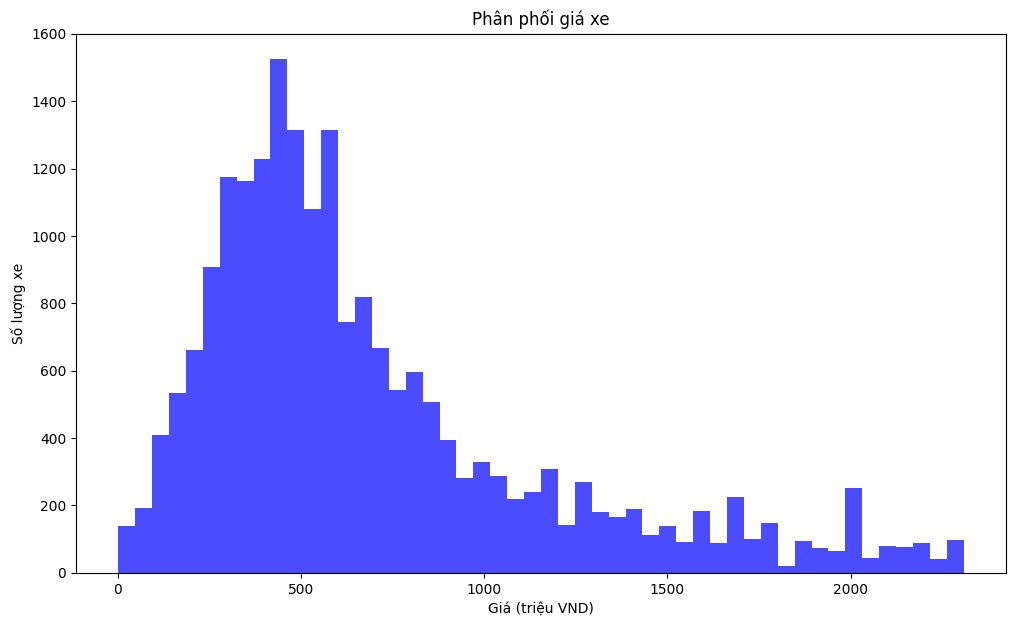

In [182]:
# vẽ biểu đồ phân phối giá sau khi làm sạch
plt.figure(figsize=(12, 7))
plt.hist(data_clean['price'], bins=50, color='blue', alpha=0.7)
plt.title('Phân phối giá xe')
plt.xlabel('Giá (triệu VND)')
plt.ylabel('Số lượng xe')
plt.show()

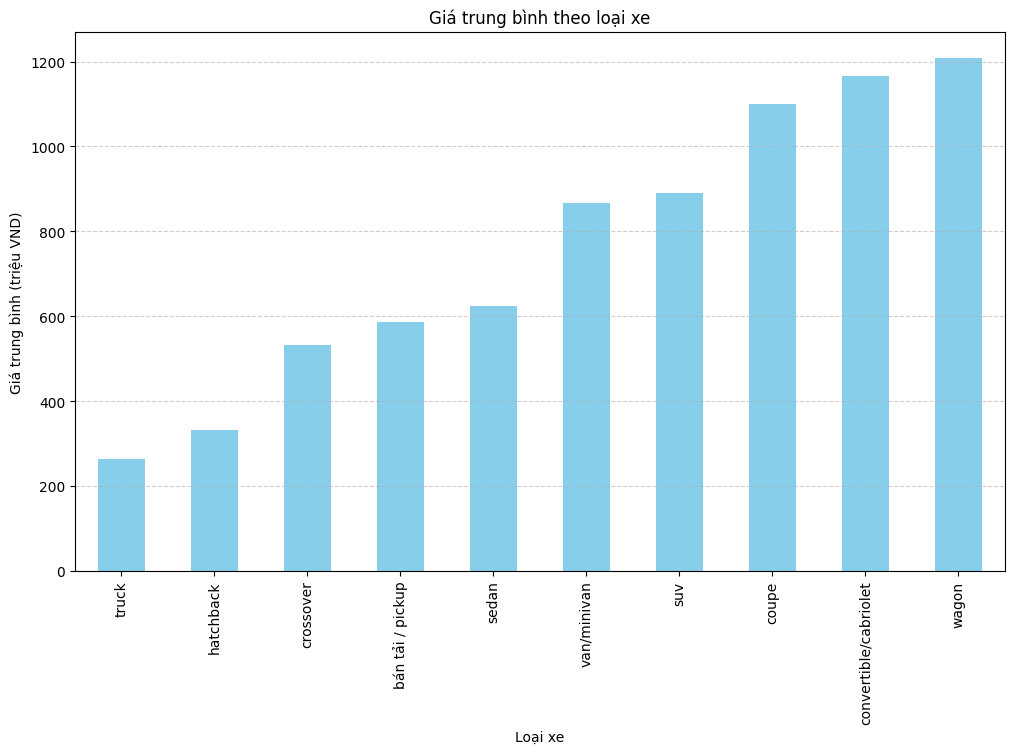

In [183]:
# Biểu đồ giá xe theo loại xe 
plt.figure(figsize=(12, 7))
data_clean.groupby('type')['price'].mean().sort_values().plot(kind='bar', color='skyblue')
plt.title('Giá trung bình theo loại xe')
plt.xlabel('Loại xe')
plt.ylabel('Giá trung bình (triệu VND)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

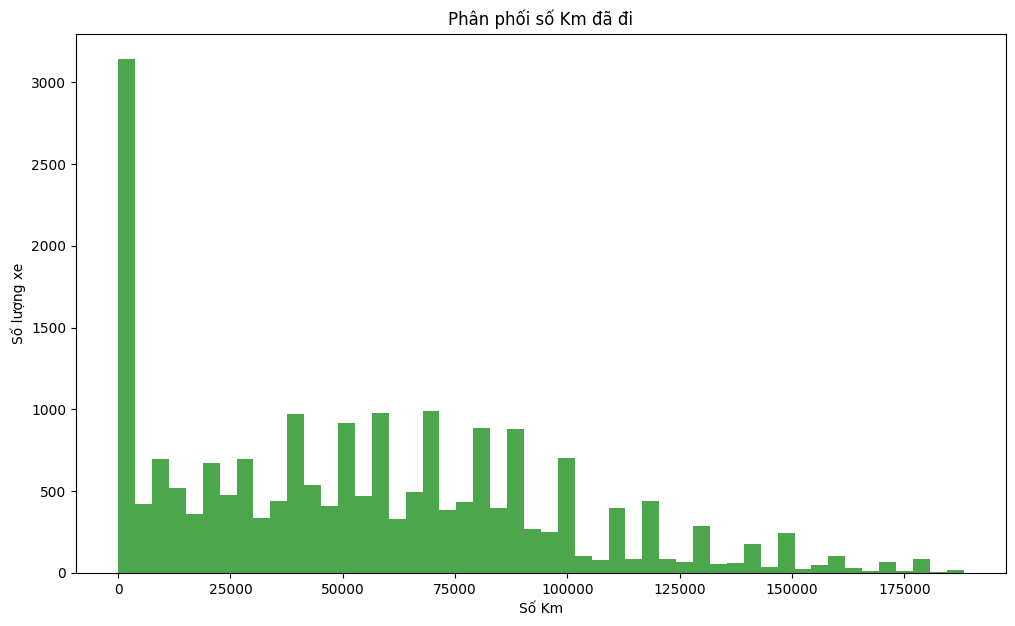

In [184]:
# biểu đồ phân phối số km đã đi
plt.figure(figsize=(12, 7))
plt.hist(data_clean['km'], bins=50, color='green', alpha=0.7)
plt.title('Phân phối số Km đã đi')
plt.xlabel('Số Km')
plt.ylabel('Số lượng xe')
plt.show()

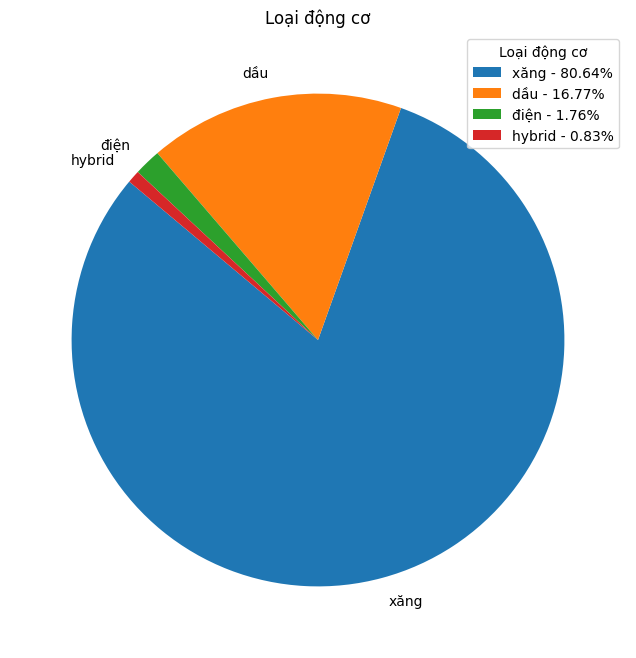

In [185]:
# biểu đồ tròn phân bố loại động cơ, không hiển thị phần trăm trên biểu đồ, hiện trên chú giải cả số %
engine_type_counts = data_clean['engine_type'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(engine_type_counts, labels=engine_type_counts.index, startangle=140)
plt.title('Loại động cơ')
plt.legend(title='Loại động cơ', loc='upper right', labels=[f"{i} - {j/engine_type_counts.sum()*100:.2f}%" for i, j in zip(engine_type_counts.index, engine_type_counts)])
plt.show()

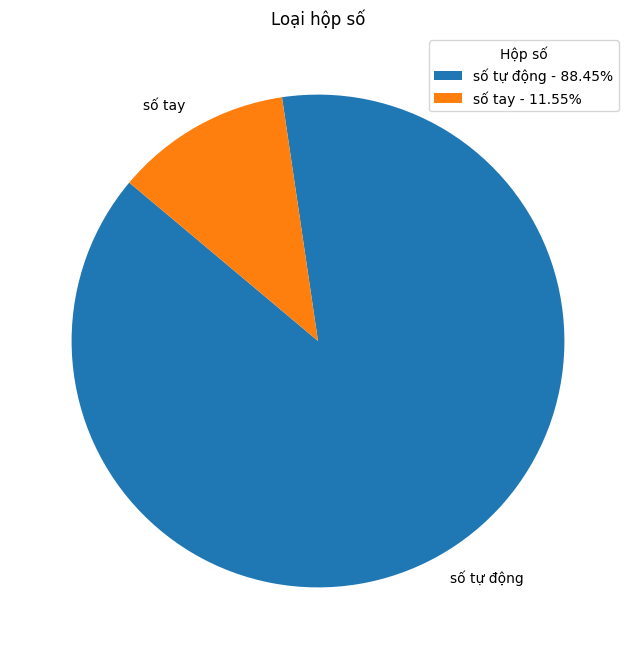

In [186]:
# biểu đồ tròn phân bố hộp số
transmission_type_counts = data_clean['transmission'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(transmission_type_counts, labels=transmission_type_counts.index, startangle=140)
plt.title('Loại hộp số')
plt.legend(title='Hộp số', loc='upper right', labels=[f"{i} - {j/transmission_type_counts.sum()*100:.2f}%" for i, j in zip(transmission_type_counts.index, transmission_type_counts)])
plt.show()

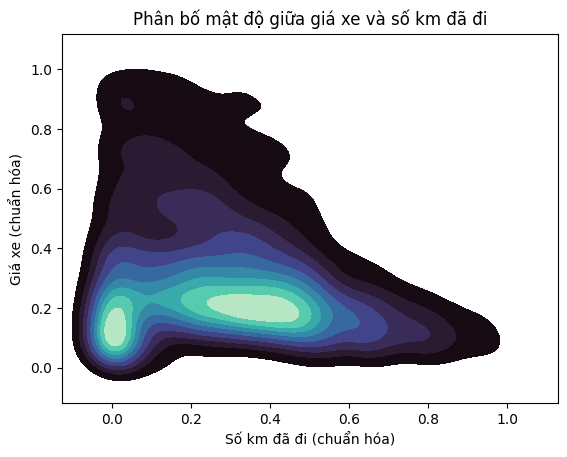

In [189]:
import seaborn as sns
sns.kdeplot(
    x='km_norm',
    y='price_norm',
    data=data_clean,
    fill=True,
    cmap='mako',
    thresh=0.05
)
plt.title('Phân bố mật độ giữa giá xe và số km đã đi')
plt.xlabel('Số km đã đi (chuẩn hóa)')
plt.ylabel('Giá xe (chuẩn hóa)')
plt.show()
